####  Случайный лес и бэггинг

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import numpy as np
import seaborn as sns

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

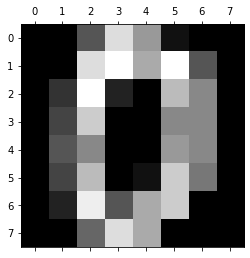

In [7]:
#загрузка датасета digits из sklearn
digits = load_digits()
print(digits.DESCR)
X = digits.data
Y = digits.target
plt.gray()
plt.matshow(digits.images[0])
plt.show() 

In [4]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [11]:
# построим решающее дерево с помощью  DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC_score = cross_val_score(DTC,X,Y,cv=10)
print(DTC_score)
print("Mean of an cross_val_score", DTC_score.mean())

[0.77222222 0.82222222 0.83333333 0.76666667 0.78888889 0.89444444
 0.90555556 0.82122905 0.81564246 0.81005587]
Mean of an cross_val_score 0.823026070763501


In [14]:
#теперь воспользуемся BaggingClassifier
bag_cls = BaggingClassifier(DTC, n_estimators = 100, max_features = int(np.sqrt(X.shape[1])))
bc_score = cross_val_score(bag_cls,X,Y,cv=10)
print(bc_score)
print("Mean of an cross_val_score", bc_score.mean())

[0.88333333 0.95555556 0.93888889 0.87777778 0.95       0.92777778
 0.96666667 0.98882682 0.90502793 0.92178771]
Mean of an cross_val_score 0.9315642458100559


In [15]:
#попробуем выбрать случайные признаки не один раз на все дерево, 
#а при построении каждой вершины дерева
DTC = DecisionTreeClassifier(max_features = "sqrt")
bag_cls = BaggingClassifier(DTC, n_estimators = 100)
bc_score = cross_val_score(bag_cls,X,Y,cv=10)
print(bc_score)
print("Mean of an cross_val_score", bc_score.mean())

[0.88333333 0.96666667 0.95       0.92222222 0.96111111 0.96111111
 0.97777778 0.96648045 0.92178771 0.93854749]
Mean of an cross_val_score 0.9449037864680323


In [30]:
#теперь воспользуемся RandomForestClassifier
rf_cls = RandomForestClassifier()
rfc_score = cross_val_score(rf_cls,X,Y,cv=10)
print(rfc_score)
print("Mean of an cross_val_score", rfc_score.mean())

[0.90555556 0.98333333 0.96111111 0.92222222 0.95       0.97222222
 0.97222222 0.96089385 0.91061453 0.94413408]
Mean of an cross_val_score 0.9482309124767225


In [31]:
#посмотрим, как rfc_score зависит от некоторых параметров.
#1)кол-во деревьев
arg_range = np.array([10,50,100])
train_scores, test_scores = validation_curve(rf_cls,X,Y,param_name = "n_estimators", param_range = arg_range, cv=5 )
print("training score:", train_scores.mean(axis =1), "training score deviation:", train_scores.std(axis=1))
print("test score:", test_scores.mean(axis =1), "test score deviation:", test_scores.std(axis=1))


training score: [0.99944348 1.         1.        ] training score deviation: [0.00052071 0.         0.        ]
test score: [0.90150727 0.94436862 0.9354689 ] test score deviation: [0.02951102 0.01635753 0.02122352]


In [32]:
#2)количество признаков, выбираемых при построении каждой вершины дерева
arg_range = np.array([1,3,5,8,15,25])
train_scores, test_scores = validation_curve(rf_cls,X,Y,param_name = "max_features", param_range = arg_range, cv=5 )
print("training score:", train_scores.mean(axis =1), "training score deviation:", train_scores.std(axis=1))
print("test score:", test_scores.mean(axis =1), "test score deviation:", test_scores.std(axis=1))


training score: [1. 1. 1. 1. 1. 1.] training score deviation: [0. 0. 0. 0. 0. 0.]
test score: [0.9354658  0.94380687 0.93880068 0.93267874 0.93992108 0.93101207] test score deviation: [0.02372636 0.01879405 0.01538917 0.02326011 0.02202802 0.02366532]


In [38]:
#3)ограничения на глубину дерева
arg_range = np.array([5, 10, 50, 100,200])
train_scores, test_scores = validation_curve(rf_cls, X, Y, param_name="max_depth", param_range=arg_range, cv=5)
print("training score:", train_scores.mean(axis =1), "training score deviation:", train_scores.std(axis=1))
print("test score:", test_scores.mean(axis =1), "test score deviation:", test_scores.std(axis=1))


training score: [0.97120179 1.         1.         1.         1.         1.        ] training score deviation: [0.00310139 0.         0.         0.         0.         0.        ]
test score: [0.89484834 0.93880842 0.93379913 0.93936243 0.93546735 0.9399087 ] test score deviation: [0.03147651 0.02335434 0.02236068 0.02620757 0.019799   0.01465227]
